In [3]:
from fastai.text.all import *
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [4]:
torch.__version__

'1.13.1+cu117'

In [5]:
torch.cuda.is_available()

True

In [6]:
path_top21 =  Path('data/train21_shuffled.csv')
df = pd.read_csv(path_top21)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


In [53]:
df_reduced = df.iloc[:1500]

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
1495,5,16,4,"Oh, look at that. Cupids and hearts. Really shoving our faces in it this year. You doin OK, bud?",Michael,False
1496,7,16,6,It's got you.,Holly,False
1497,6,19,40,It stopped.,Jim,False
1498,5,25,24,Cafe Disco? More like Crappe Disco.,Kelly,False


<Axes: >

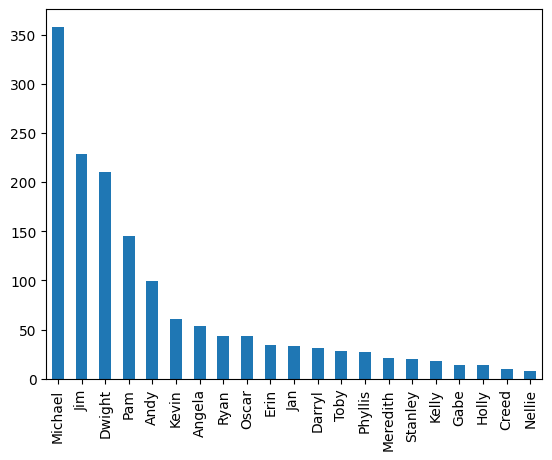

In [54]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [55]:
max_dialog = df_reduced['speaker'].value_counts().max()

358

In [56]:
import random

dfs_oversampled = [df_reduced]
for _, group in df_reduced.groupby('speaker'):
    rand_mult = random.uniform(0.75, 1.25)
    sample_amt_to_max = max_dialog - len(group)
    dfs_oversampled.append(group.sample(int(sample_amt_to_max * rand_mult), replace=True))
df_reduced = pd.concat(dfs_oversampled)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
1163,4,2,2,"Yes, uh some people in the office have complained...",Toby,False
542,4,14,19,Hey Michael.,Toby,False
1452,3,8,30,Um... You might want these orientation materials.,Toby,False
978,8,18,16,"No, you hit the road, jack.",Toby,False


In [57]:
random.uniform(0.5, 1.5)

1.232707534588477

<Axes: >

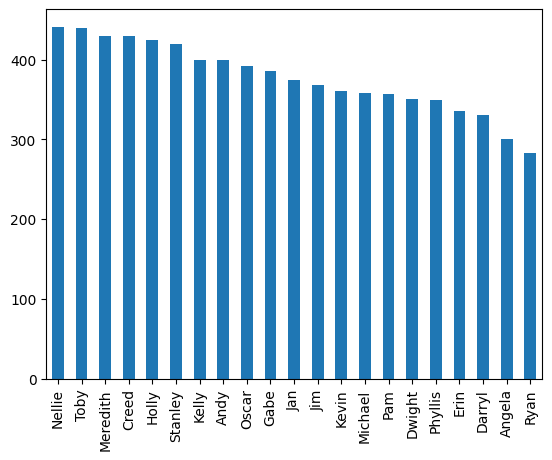

In [58]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [63]:
dls = TextDataLoaders.from_df(df_reduced, text_col='line_text', label_col='speaker', shuffle_train=True)
dls.show_batch()

,text,category
0,"xxbos xxmaj finally . xxmaj right ? xxmaj ok , xxmaj phyllis you must be xxunk from standing on those xxunk . xxmaj why do n't you have a xxunk ? [ phyllis sits ] xxmaj let 's all xxunk at xxmaj phyllis . [ everyone claps ] xxmaj ok ! [ in xxmaj michael xxmaj clump voice ] xxmaj when xxmaj michael xxmaj clump wants to xxunk you [ normal voice ] that corporate … their idea , yes , was to xxunk you to lose xxunk , but more xxunk what this whole thing is about , this contest is really about being xxunk . xxmaj and in order to be xxunk , you have to eat , xxmaj kelly . xxmaj kelly . [ xxunk down in front of xxmaj kelly , xxmaj dwight tries to help him down , xxmaj michael xxunk xxunk at him ]",Michael
1,"xxbos xxmaj aw , thanks , xxmaj pete . xxmaj that was really nice . i just want to say how happy we are that all of you are here tonight . xxmaj and i want to especially thank those of you who xxunk from far away to be here with us tonight … especially the xxmaj xxunk xxunk who , obviously , ca n't take a xxunk . [ laughter ] xxmaj four years ago , i was just a guy who had a crush on a girl who had a xxunk . xxmaj and i had to do the xxunk thing that xxmaj i 've ever had to do … which was just to wait . xxmaj uh , do n't get me wrong . i xxunk with her . xxmaj pam , i can now admit in front of my friends and family that i do know",Jim
2,"xxbos [ xxunk throat and stands ] xxmaj ladies and gentlemen of … the … table . i would just like to say what a xxunk it is for me to be here today , but xxunk , at my xxunk , it 's a xxunk to be xxunk [ no one laughs ] . xxmaj i 'm only forty - four , so xxmaj i 'm not old , and i guess that does n't really play . xxmaj but the point is , i have a sense of humor . xxmaj and i xxunk you all to have a sense of humor as well . xxmaj jan , xxmaj david , my xxunk xxunk [ xxunk xxmaj jan , then turns to xxmaj david xxmaj wallace ] , my xxunk company … xxmaj why do n't we all just take a big xxunk breath … and just xxunk",Michael
3,"xxbos [ text message chime ] xxmaj you know what ? xxmaj let me just double check , that bird … xxmaj okay , good . xxmaj it 's off . i mean , silenced . i silenced it by killing it . xxmaj i 've killed it ! xxmaj i 'm a murderer ! xxmaj just like you , xxmaj sweeney xxmaj todd . xxmaj see , it all connects . xxmaj not that i know you 're a murderer . xxmaj my character does n't know that yet . xxmaj but xxmaj i 'm suspicious , because of all the razors that you have laying around . xxmaj and you spend time alone . xxmaj but you 're a barber , so that 's legit . xxmaj so there 's that . xxmaj but …",Andy
4,"xxbos [ text message chime ] xxmaj you know what ? xxmaj let me just double check , that bird … xxmaj okay , good . xxmaj it 's off . i mean , silenced . i silenced it by killing it . xxmaj i 've killed it ! xxmaj i 'm a murderer ! xxmaj just like you , xxmaj sweeney xxmaj todd . xxmaj see , it all connects . xxmaj not that i know you 're a murderer . xxmaj my character does n't know that yet . xxmaj but xxmaj i 'm suspicious , because of all the razors that you have laying around . xxmaj and you spend time alone . xxmaj but you 're a barber , so that 's legit . xxmaj so there 's that . xxmaj but …",Andy
5,"xxbos [ text message chime ] xxmaj you know what ? xxmaj let me just double check , that bird … xxmaj okay , good . xxmaj it 's off . i mean , silenced . i silenced it by killing it . xxmaj i 've killed it ! xxmaj i 'm a murderer ! xxmaj just like you , xxmaj sweeney xxmaj todd . xxmaj see , it all connects . xxmaj not that i know you 're a murderer . xxmaj my character does n't know that yet . xxmaj but xxmaj i 'm suspicious , because of all the razors that you have laying around . xxmaj and you spend time alone . xxmaj but you 're a barber , so that 's legit . xxmaj so there 's that . xxmaj but …",Andy
6,"xxbos i am attracted to weird , wrong men . i dated a violent karate instructor and then an unemployed fireman . xxmaj life has been complicated .

In [64]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.75, metrics=accuracy)
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.958372,2.615134,0.296530,00:03


epoch,train_loss,valid_loss,accuracy,time
0,2.579254,2.158993,0.430284,00:04
1,2.107592,1.497872,0.589274,00:04
2,1.605633,0.861731,0.750789,00:04
3,1.153742,0.606899,0.817666,00:04
4,0.808333,0.488794,0.839117,00:04
5,0.615552,0.437122,0.859937,00:04
6,0.485189,0.390357,0.876341,00:04
7,0.409589,0.376897,0.878864,00:04
8,0.377380,0.349012,0.883912,00:04
9,0.348163,0.352072,0.885173,00:04


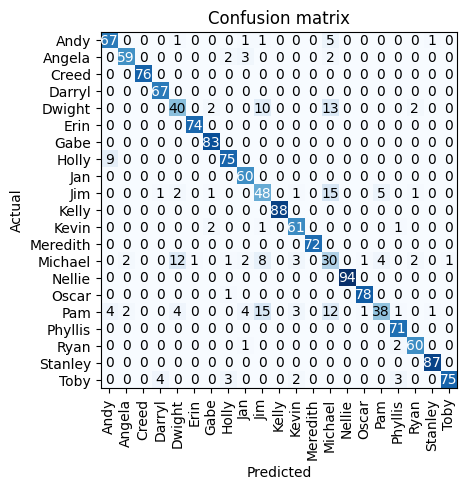

In [65]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [66]:
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.370182,0.576494,0.839748,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.406073,0.373873,0.880126,00:04
1,0.392029,0.357258,0.887697,00:04
2,0.436483,0.397096,0.871924,00:04
3,0.428856,0.358558,0.887066,00:04
4,0.359512,0.345511,0.894006,00:04
5,0.323878,0.344867,0.899054,00:04
6,0.291593,0.313581,0.907256,00:04
7,0.236531,0.323308,0.908517,00:04
8,0.225293,0.323455,0.902839,00:04
9,0.210618,0.310749,0.906625,00:04


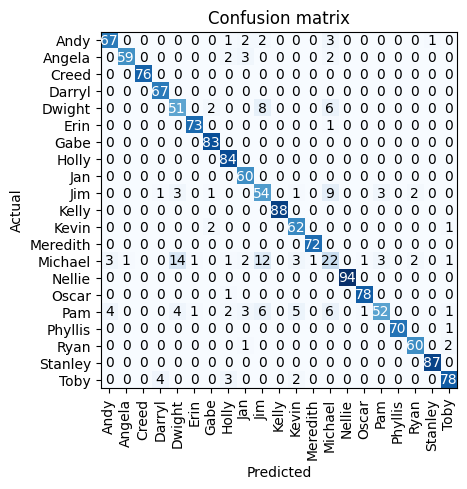

In [67]:
interp.plot_confusion_matrix()

In [68]:
dls.show_batch()

,text,category
0,"xxbos xxmaj finally . xxmaj right ? xxmaj ok , xxmaj phyllis you must be xxunk from standing on those xxunk . xxmaj why do n't you have a xxunk ? [ phyllis sits ] xxmaj let 's all xxunk at xxmaj phyllis . [ everyone claps ] xxmaj ok ! [ in xxmaj michael xxmaj clump voice ] xxmaj when xxmaj michael xxmaj clump wants to xxunk you [ normal voice ] that corporate … their idea , yes , was to xxunk you to lose xxunk , but more xxunk what this whole thing is about , this contest is really about being xxunk . xxmaj and in order to be xxunk , you have to eat , xxmaj kelly . xxmaj kelly . [ xxunk down in front of xxmaj kelly , xxmaj dwight tries to help him down , xxmaj michael xxunk xxunk at him ]",Michael
1,"xxbos xxmaj aw , thanks , xxmaj pete . xxmaj that was really nice . i just want to say how happy we are that all of you are here tonight . xxmaj and i want to especially thank those of you who xxunk from far away to be here with us tonight … especially the xxmaj xxunk xxunk who , obviously , ca n't take a xxunk . [ laughter ] xxmaj four years ago , i was just a guy who had a crush on a girl who had a xxunk . xxmaj and i had to do the xxunk thing that xxmaj i 've ever had to do … which was just to wait . xxmaj uh , do n't get me wrong . i xxunk with her . xxmaj pam , i can now admit in front of my friends and family that i do know",Jim
2,"xxbos i understand . xxmaj it 's in a blind spot because xxmaj i 'm xxunk in several xxunk xxunk and one of them , uh , includes , uh , an awareness that the xxunk bring , uh , of anything on all sides of you . xxmaj it could be behind you or whatever . xxmaj this is directly in a blind spot , so xxmaj i 'm xxunk to xxunk xxunk to something right above my head . [ new take ] xxmaj this now i have an eye on . xxmaj you see , it 's on my xxunk and if i needed to xxunk it , attack it , stop it somehow . [ does a xxunk xxunk move with his hands ] i could come right out . i mean , i know you 're doing your job , but … xxmaj xxunk xxmaj",Dwight
3,"xxbos [ text message chime ] xxmaj you know what ? xxmaj let me just double check , that bird … xxmaj okay , good . xxmaj it 's off . i mean , silenced . i silenced it by killing it . xxmaj i 've killed it ! xxmaj i 'm a murderer ! xxmaj just like you , xxmaj sweeney xxmaj todd . xxmaj see , it all connects . xxmaj not that i know you 're a murderer . xxmaj my character does n't know that yet . xxmaj but xxmaj i 'm suspicious , because of all the razors that you have laying around . xxmaj and you spend time alone . xxmaj but you 're a barber , so that 's legit . xxmaj so there 's that . xxmaj but …",Andy
4,"xxbos [ text message chime ] xxmaj you know what ? xxmaj let me just double check , that bird … xxmaj okay , good . xxmaj it 's off . i mean , silenced . i silenced it by killing it . xxmaj i 've killed it ! xxmaj i 'm a murderer ! xxmaj just like you , xxmaj sweeney xxmaj todd . xxmaj see , it all connects . xxmaj not that i know you 're a murderer . xxmaj my character does n't know that yet . xxmaj but xxmaj i 'm suspicious , because of all the razors that you have laying around . xxmaj and you spend time alone . xxmaj but you 're a barber , so that 's legit . xxmaj so there 's that . xxmaj but …",Andy
5,"xxbos [ text message chime ] xxmaj you know what ? xxmaj let me just double check , that bird … xxmaj okay , good . xxmaj it 's off . i mean , silenced . i silenced it by killing it . xxmaj i 've killed it ! xxmaj i 'm a murderer ! xxmaj just like you , xxmaj sweeney xxmaj todd . xxmaj see , it all connects . xxmaj not that i know you 're a murderer . xxmaj my character does n't know that yet . xxmaj but xxmaj i 'm suspicious , because of all the razors that you have laying around . xxmaj and you spend time alone . xxmaj but you 're a barber , so that 's legit . xxmaj so there 's that . xxmaj but …",Andy
6,"xxbos i am attracted to weird , wrong men . i dated a violent karate instructor and then an unemployed fireman . xxmaj life has bee

In [80]:
learner.predict("dwight try to help him down")

('Michael',
 tensor(13),
 tensor([6.8830e-03, 1.8570e-03, 6.0280e-04, 8.4419e-04, 1.4525e-01, 1.8000e-02,
         1.1042e-03, 3.5248e-04, 7.9852e-05, 1.4444e-01, 2.2287e-05, 1.9817e-03,
         2.9321e-05, 6.3747e-01, 3.0219e-03, 5.6921e-05, 2.6025e-03, 6.0319e-06,
         1.0038e-04, 2.4003e-03, 3.2890e-02]))

In [81]:
# learner.save('20_epoch_with_randomization')

Path('models/20_epoch_with_randomization.pth')